Name: Drumil Kotecha, Course: BTI, Roll: C052;

Aim: Use descriptors to align images

Task 1: Determine location of key points and descriptors for an image and image to be aligned

Task 2: Determine matching key points of the two images

Task 3: Determine transformation matrix using matched key points

Task 4: Use transformation matrix to align the image to be aligned


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [ ]:
img1 = cv2.imread('/content/book2.jpg')
img2 = cv2.imread('/content/book1.jpg')

In [ ]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

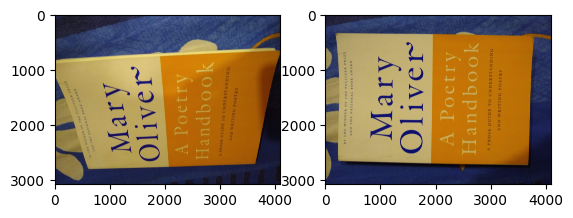

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [ ]:
img1_g = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_g = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

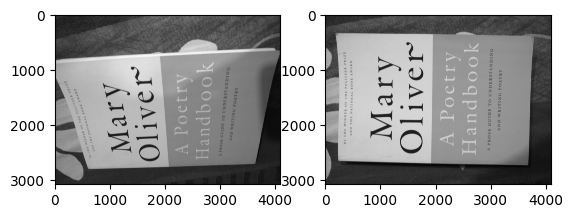

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1_g, cmap="gray")
ax[1].imshow(img2_g, cmap="gray")

In [ ]:
orb = cv2.ORB_create(500)
k1, d1 = orb.detectAndCompute(img1_g, None)
k2, d2 = orb.detectAndCompute(img2_g, None)

In [ ]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = matcher.match(d1, d2)

In [ ]:
ln = len(matches)

In [ ]:
matches = sorted(matches, key=lambda x: x.distance)

In [ ]:
print(matches[0].distance)

14.0


In [ ]:
ln = int(ln * 0.9)

In [ ]:
matches = matches[:ln]

In [ ]:
kp1 = np.zeros((ln, 2))
kp2 = np.zeros((ln, 2))

In [ ]:
kp1.shape
kp2.shape

(450, 2)

In [ ]:
for i in range(ln):
  kp1[i, :] = k1[matches[i].queryIdx].pt
  kp2[i, :] = k2[matches[i].trainIdx].pt

In [ ]:
h, mask = cv2.findHomography(kp1, kp2, cv2.RANSAC)

In [ ]:
h

array([[ 7.08082041e-01, -3.32342682e-01,  6.03295064e+02],
       [ 3.02387006e-02,  6.14703129e-01, -1.18835423e+02],
       [-9.15349545e-06, -1.41771774e-04,  1.00000000e+00]])

In [ ]:
img_warp = cv2.warpPerspective(img1, h, (img2_g.shape[1], img2_g.shape[0]))

Text(0.5, 1.0, 'Aligned Image')

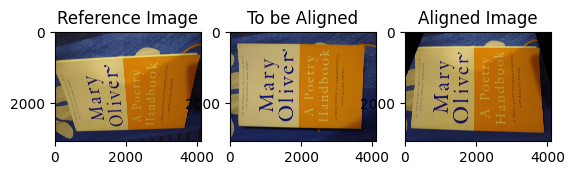

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[0].set_title("Reference Image")
ax[1].imshow(img2)
ax[1].set_title("To be Aligned")
ax[2].imshow(img_warp)
ax[2].set_title("Aligned Image")

Self-code


In [ ]:
img2 = cv2.imread('/content/cube.png')
img1 = imutils.rotate(img2, 45)

In [ ]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

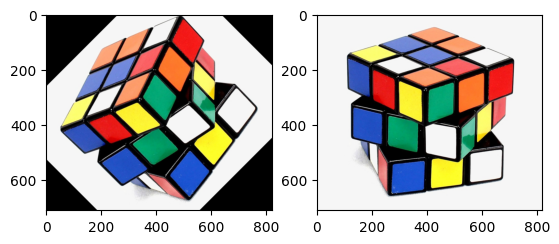

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [ ]:
img1_g = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_g = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

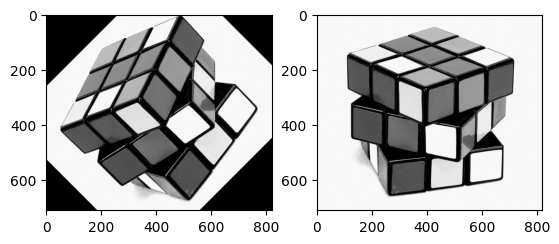

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1_g, cmap="gray")
ax[1].imshow(img2_g, cmap="gray")

In [ ]:
orb = cv2.ORB_create(500)
k1, d1 = orb.detectAndCompute(img1_g, None)
k2, d2 = orb.detectAndCompute(img2_g, None)

In [ ]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = matcher.match(d1, d2)

In [ ]:
ln = len(matches)

In [ ]:
matches = sorted(matches, key=lambda x: x.distance)

In [ ]:
print(matches[0].distance)

5.0


In [ ]:
ln = int(ln * 0.9)

In [ ]:
matches = matches[:ln]

In [ ]:
kp1 = np.zeros((ln, 2))
kp2 = np.zeros((ln, 2))

In [ ]:
kp1.shape
kp2.shape

(450, 2)

In [ ]:
for i in range(ln):
  kp1[i, :] = k1[matches[i].queryIdx].pt
  kp2[i, :] = k2[matches[i].trainIdx].pt

In [ ]:
h, mask = cv2.findHomography(kp1, kp2, cv2.RANSAC)

In [ ]:
h

array([[ 7.06884560e-01, -7.05576457e-01,  3.70627961e+02],
       [ 7.06190844e-01,  7.11221422e-01, -1.86231132e+02],
       [-3.29625121e-06,  8.36417918e-06,  1.00000000e+00]])

In [ ]:
img_warp = cv2.warpPerspective(img1, h, (img2_g.shape[1], img2_g.shape[0]))

Text(0.5, 1.0, 'Aligned Image')

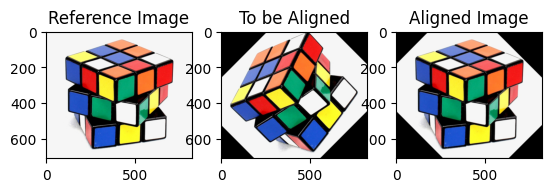

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(img2)
ax[0].set_title("Reference Image")
ax[1].imshow(img1)
ax[1].set_title("To be Aligned")
ax[2].imshow(img_warp)
ax[2].set_title("Aligned Image")

Conclusion: ORB descriptor is used to align images with 450 keypoints are used to generate homography matrix which is used to warp the image is used to warp the image by 10 degrees even then the image can be aligned to reference image using the above technique. The requirement of alignment is that the images should have sufficient number of corners.